In [34]:
# importa os pacotes
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [35]:
# carrega a imagem original
img = cv2.imread('ronchi.bmp', cv2.IMREAD_GRAYSCALE)

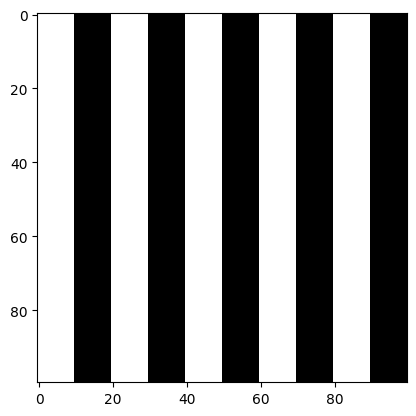

In [36]:
# plota a imagem original
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [37]:
# normaliza os valores dos pixels [0 255]
img32 = np.float32(img)/255
print(img32.min())
print(img32.max())

0.0
1.0


In [38]:
# calcula a Transformada de Fourier da imagem original
dft = cv2.dft(img32, flags = cv2.DFT_COMPLEX_OUTPUT)
print(dft.shape)

(100, 100, 2)


<ipython-input-39-631770021d78>:11: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(cv2.magnitude(real, imag))


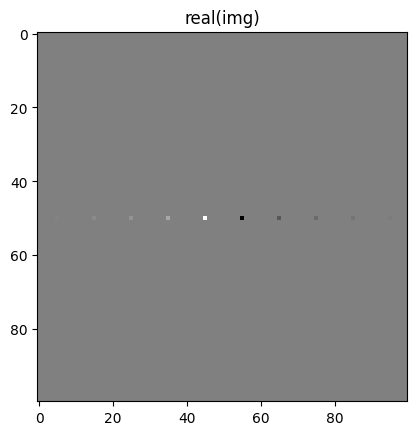

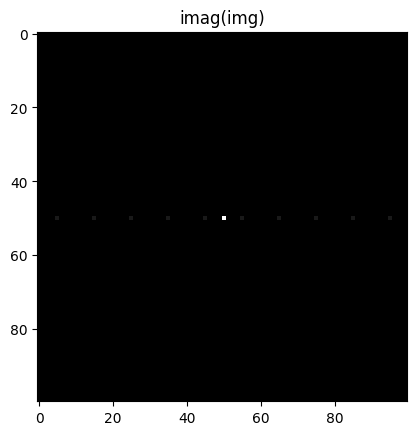

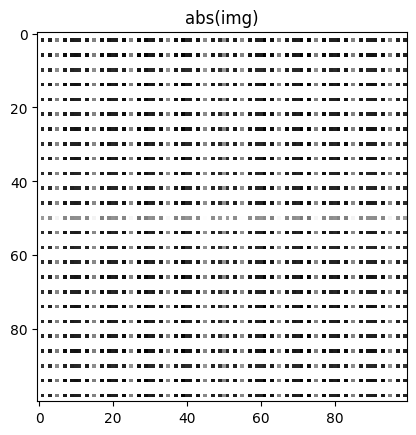

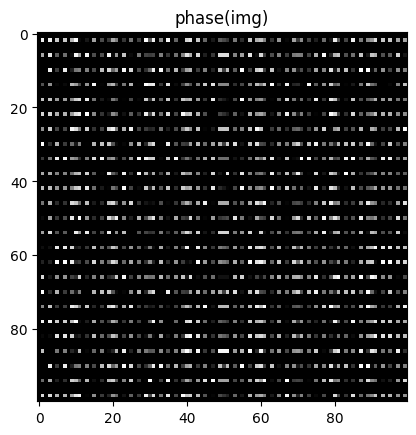

In [39]:
# reordena o posicionamento dos pixels para colocar a referencia no centro da imagem
dft_shift = np.fft.fftshift(dft)

# extrai a parte real
real = dft_shift[:,:,0]

# extrai a parte imaginaria
imag = dft_shift[:,:,1]

# extrai a magnitude
mag = 20*np.log10(cv2.magnitude(real, imag))

# extrai a fase
phase = cv2.phase(real, imag)

# plota a parte real
plt.title('real(img)')
plt.imshow(real, cmap='gray')
plt.show()

# plota a parte imaginaria
plt.title('imag(img)')
plt.imshow(imag, cmap='gray')
plt.show()

# plota a magnitude
plt.title('abs(img)')
plt.imshow(mag, cmap='gray')
plt.show()

# plota a fase
plt.title('phase(img)')
plt.imshow(phase, cmap='gray')
plt.show()

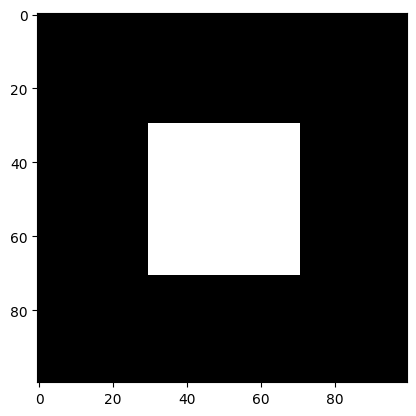

In [40]:
# cria uma mascara quadrada na qual os pixels mais externos são iguais a zero
# e os pixels mais internos são iguais a um
mask = np.zeros((100,100,2), np.uint8)
mask[50-20:50+21, 50-20:50+21] = 1

# plota a máscara
plt.imshow(mask[:,:,0], cmap='gray')
plt.show()

<ipython-input-41-3673da1dc9cc>:7: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(cv2.magnitude(real, imag))


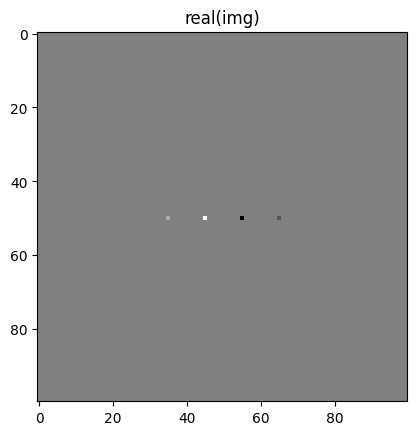

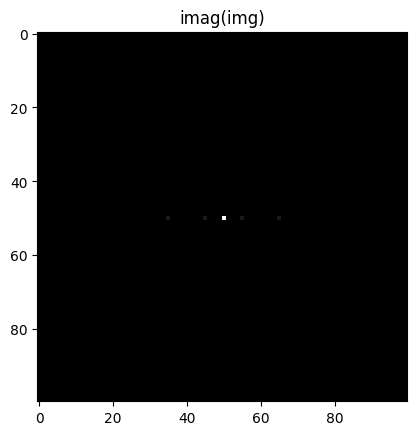

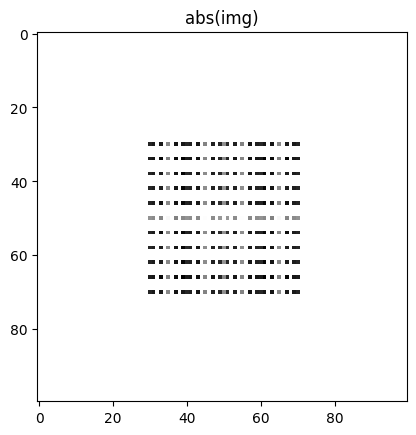

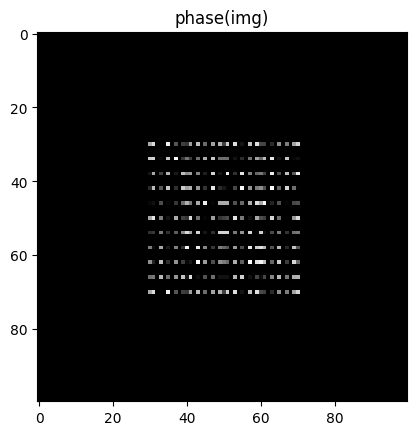

In [41]:
# multiplica a imagem da TF com a máscara
fshift = dft_shift * mask

# extrai as partes real, imaginária, magnitude e fase da imagem resultante
real = fshift[:,:,0]
imag = fshift[:,:,1]
mag = 20*np.log10(cv2.magnitude(real, imag))
phase = cv2.phase(real, imag)

# plota a parte real
plt.title('real(img)')
plt.imshow(real, cmap='gray')
plt.show()

# plota a parte imaginaria
plt.title('imag(img)')
plt.imshow(imag, cmap='gray')
plt.show()

# plota a magnitude
plt.title('abs(img)')
plt.imshow(mag, cmap='gray')
plt.show()

# plota a fase
plt.title('phase(img)')
plt.imshow(phase, cmap='gray')
plt.show()

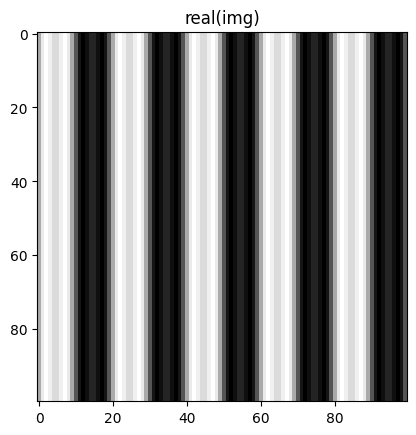

In [ ]:
# reordena o posicionamento dos pixels para colocar a referencia na posição original
f_ishift = np.fft.ifftshift(fshift)

# calcula a Transformada de Fourier Inversa
img_back = cv2.idft(f_ishift)

# a imagem resultante está na parte real
real = img_back[:,:,0]

# plota a imagem resultante
plt.title('real(img)')
plt.imshow(real, cmap='gray')
plt.show()